# Objective
1. define mutation function
2. define crossover function
3. define fitness function for calculation h
4. define selection function for choosing the new generatoin
5. find the best h using genetic algorithm (h=0 is the best)

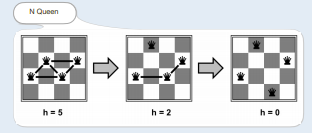

In [ ]:
import pandas as pd
import random 
import copy

# Mutation function

In [ ]:
#mutation (random)

def mutation(population):
  mutated = []
  p = copy.deepcopy(population)
  for pop in p:
    n=len(pop)
    pos = int(random.random()*n)
    pop[pos]=int(random.random()*n)
    mutated.append(pop)
  return mutated

# Crossover function

In [ ]:
#crossover (random)

def cross_over(population):
  n=len(population[0])
  pos = [i for i in range(1,n-1)]
  s_pos = random.choice(pos)
  p1 = population[0]
  p2 = population[1]
  good_pos = []

  op1 = p1[:s_pos]+p2[s_pos:]
  op2 = p2[:s_pos]+p1[s_pos:]

  return [op1,op2]

# Fitness function

In [ ]:
#= heuristic function in Hill climb to calculate h

def fitness(population,n):
  h = 0 
  for i in range(n):
    for j in range(i+1,n):
      if population[i] == population[j]:
        h += 1
      if abs(population[i]-population[j]) == abs(i-j):
        h += 1
  return h

# Selection function

In [ ]:
#select 2 best candidates

def selection(population,n):
  unique_pop = []
  for pop in population:
    if pop not in unique_pop:
      unique_pop.append(pop)
  population = unique_pop
  find_fitness = [(fitness(pop,n),pop) for pop in population]
  find_fitness.sort()
  return find_fitness[0],[p for f,p in find_fitness[:2]]

# Test all functions

In [ ]:
n=6

population = [[int(random.random()*n) for i in range(n)]]
population += [[int(random.random()*n) for i in range(n)]]
print(population)

[[4, 2, 5, 4, 1, 3], [1, 2, 5, 4, 2, 3]]


In [ ]:
mutated=mutation(population)
print(mutated)

[[4, 3, 5, 4, 1, 3], [4, 2, 5, 4, 2, 3]]


In [ ]:
crossovered=cross_over(mutated)
print(crossovered)

[[4, 3, 5, 4, 2, 3], [4, 2, 5, 4, 1, 3]]


In [ ]:
fitness(crossovered[0],n)

5

In [ ]:
fitness(crossovered[1],n)

3

In [ ]:
selection(crossovered,n)

((3, [4, 2, 5, 4, 1, 3]), [[4, 2, 5, 4, 1, 3], [4, 3, 5, 4, 2, 3]])

In [ ]:
population+mutated+crossovered

[[4, 4, 1, 5, 0, 3],
 [4, 4, 1, 0, 3, 3],
 [5, 4, 3, 0, 3, 3],
 [4, 4, 1, 5, 0, 3],
 [4, 3, 5, 4, 2, 3],
 [4, 2, 5, 4, 1, 3]]

In [ ]:
selection(population+mutated+crossovered,n)

((3, [4, 2, 5, 4, 1, 3]), [[4, 2, 5, 4, 1, 3], [4, 4, 1, 5, 0, 3]])

In [ ]:
selection(population+mutated+crossovered,n)[0]

(3, [4, 2, 5, 4, 1, 3])

In [ ]:
selection(population+mutated+crossovered,n)[0][0]

3

In [ ]:
selection(population+mutated+crossovered,n)[0][1]

[4, 2, 5, 4, 1, 3]

In [ ]:
selection(population+mutated+crossovered,n)[1]

[[4, 2, 5, 4, 1, 3], [4, 4, 1, 5, 0, 3]]

# Finding the best h using Genetic algorithm

In [ ]:
#steps
#1. define population
#2. 1st gen = population + mutation + crossover
#3. find the best 2 candidates from gen 1 using selection function
#4. repeat until we find the best h (h=0 is the best case)


#first gen
n = 6

population = [[int(random.random()*n) for i in range(n)]]
population += [[int(random.random()*n) for i in range(n)]]

gen=1 #initial generation
min_h=9999 #initial min_h value
best=[] #record the best candidate
rec_gen=[] #record generation
rec_h=[] #record h value from each generation
for i in range(1000): #limit the lteraron
  print('gen: ', gen)
  print('populaton: ', population)
  mutated=mutation(population)
  crossovered1=cross_over(mutated)
  crossovered2=cross_over(population)
  select=selection(population+mutated+crossovered1+crossovered2,n)
  if select[0][0] < min_h:
    min_h=select[0][0]
    best=select[0][1]
    print('current best from gen '+str(gen) + ' '+str(best))
    print('current h = ', select[0][0])
    population=select[1]
    rec_gen.append(gen)
    rec_h.append(select[0][0])
    gen=gen+1
    if select[0][0] == 0:
      break
  else:
    new_populatoin=mutation(population)
    population=new_populatoin
    rec_gen.append(gen)
    rec_h.append(select[0][0])
    gen=gen+1
print('min_h:', min_h)

gen:  1
populaton:  [[0, 5, 3, 4, 2, 2], [5, 2, 5, 2, 4, 3]]
current best from gen 1 [5, 2, 5, 2, 0, 3]
current h =  3
gen:  2
populaton:  [[5, 2, 5, 2, 0, 3], [0, 5, 3, 4, 2, 2]]
current best from gen 2 [1, 2, 5, 2, 0, 3]
current h =  2
gen:  3
populaton:  [[1, 2, 5, 2, 0, 3], [0, 5, 3, 2, 0, 3]]
gen:  4
populaton:  [[1, 2, 5, 2, 0, 3], [0, 5, 1, 2, 0, 3]]
current best from gen 4 [0, 5, 1, 4, 0, 3]
current h =  1
gen:  5
populaton:  [[0, 5, 1, 4, 0, 3], [0, 2, 5, 2, 0, 3]]
gen:  6
populaton:  [[0, 5, 1, 4, 0, 3], [0, 2, 5, 3, 0, 3]]
gen:  7
populaton:  [[0, 5, 1, 4, 0, 1], [0, 2, 5, 3, 0, 3]]
gen:  8
populaton:  [[0, 5, 1, 4, 0, 4], [0, 4, 5, 3, 0, 3]]
gen:  9
populaton:  [[0, 5, 1, 5, 0, 4], [0, 4, 5, 3, 0, 1]]
gen:  10
populaton:  [[0, 2, 1, 5, 0, 4], [0, 4, 5, 3, 0, 0]]
gen:  11
populaton:  [[0, 2, 1, 5, 0, 4], [0, 2, 5, 3, 0, 0]]
gen:  12
populaton:  [[0, 2, 1, 5, 3, 4], [1, 2, 5, 3, 0, 0]]
gen:  13
populaton:  [[0, 2, 1, 4, 3, 4], [1, 2, 3, 3, 0, 0]]
gen:  14
populaton:  [[0, 2, 

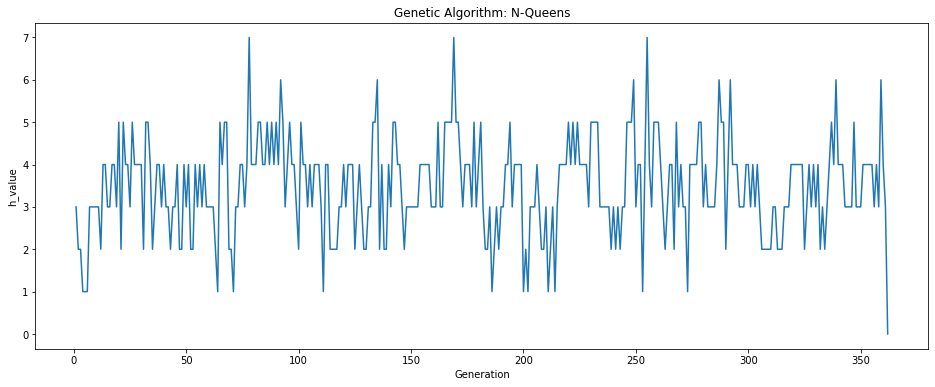

In [ ]:
#ploting the genetic algorithm process

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(16,6))
x=rec_gen
y=rec_h
plt.title("Genetic Algorithm: N-Queens") 
plt.xlabel("Generation") 
plt.ylabel("h_value") 
plt.plot(x,y) 
plt.show()